In [1]:
import math
import numpy as np
import pandas
# import modin.pandas as pandas
# import dask.dataframe as dd
# import dask.dataframe as pandas

#import matplotlib.pyplot as plt
import time
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string
import sys, os
import scipy


import matplotlib as mpl
import matplotlib.pyplot as pp

import math
import nltk
#
#from utils import get_char_count
#from utils import get_words
#from utils import get_sentences
#from utils import count_syllables
#from utils import count_complex_words

import matplotlib.pyplot as pp
import seaborn as sns; sns.set(color_codes=True)
from statsmodels.nonparametric.smoothers_lowess import lowess

import seaborn as sns
from matplotlib import pyplot as pp
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

def setupMPPTufte():
    pp.clf()
    pp.rcParams['font.family'] = 'sans-serif'
    pp.rcParams['text.latex.preamble'] = [r'\usepackage[cm]{sfmath}']
    pp.rcParams['font.family'] = 'sans-serif'
    pp.rcParams['text.usetex'] = False
    pp.rcParams['text.latex.unicode']=False
    pp.rcParams['font.sans-serif'] = 'cm'
    pp.rcParams['font.size'] = 24
    pp.rcParams['text.color'] = "#000000"
    pp.rcParams['ytick.labelsize'] = 24
    pp.rcParams['xtick.labelsize'] = 24
    pp.rcParams['ytick.color'] = '#000000'
    pp.rcParams['xtick.color'] = '#000000'
    pp.rcParams['legend.fontsize'] = 24
    pp.rcParams['lines.markersize'] = 14
    pp.rcParams['axes.titlesize'] = 24
    pp.rcParams['axes.labelcolor'] = '#000000'
    pp.rcParams['axes.labelsize'] = 24
    #     plt.rcParams['axes.edgecolor'] = '#f0f0f0'
    pp.rcParams['axes.edgecolor'] = '#525252'
    pp.rcParams['axes.linewidth'] = 1.0
    pp.rcParams['axes.grid'] = False
    #     plt.rcParams['axes.grid'] = True
    #     plt.rcParams['axes.grid.axis'] = "y"
    #     plt.rcParams['grid.linewidth'] = 3.0
    pp.rcParams['grid.color'] = "#FFFFFF"
    pp.rcParams['legend.frameon'] = True
    pp.rcParams['legend.framealpha'] = 0.1
    pp.rcParams['legend.fancybox'] = True    
    pp.rcParams['legend.numpoints'] = 1
    pp.rcParams['legend.scatterpoints'] = 1
    pp.rcParams['legend.facecolor'] = 'none'
    pp.rcParams['figure.figsize'] = 8,8
    pp.gca().spines['top'].set_visible(False)
    pp.gca().spines['bottom'].set_visible(True)
    pp.gca().spines['right'].set_visible(False)
    pp.gca().spines['left'].set_visible(True)
    pp.gca().get_xaxis().tick_bottom()
    pp.gca().get_yaxis().tick_left()
    pp.tick_params(axis='both', which='major', bottom=True, top=False, labelbottom=True, left=True,
                  right=False, labelleft=True, length=10, width=2, direction='out',  color='#ffffff')
    #   pp.tick_params(axis='both', which='major', bottom=True, top=False, labelbottom=True, left=True,
    #                   right=False, labelleft=True, length=10, width=2, direction='out',  color='#636363')
    return pp

import matplotlib.dates as mdates

def writeToFile(fileName, list):
    file = open(fileName, 'w')
    for x in list:
        file.write(str(x)+"\n")
    file.close()


def z_standardizeVector(vector):
    if np.std(vector)==0:
        return vector
    return (vector - np.mean(vector)) / (np.std(vector))

def standardizeVector(vector):
    if np.max(vector)==0:
        return vector
    return (vector - np.min(vector)) / (np.max(vector) - np.min(vector))

def doubleStandardizeVector(vector):
    if np.max(vector)==0:
        return vector
    return (2 * (vector - np.min(vector)) / (np.max(vector) - np.min(vector))-1)
    
def logStandardizeVector(vector):
#    print(min(vector), max(vector))
#    return [math.log((x+0.0000001)) for x in vector]
    return [math.log(x) for x in vector]

def remove_spines(ax):
   ax.spines['top'].set_visible(False)
   ax.spines['bottom'].set_visible(False)
   ax.spines['right'].set_visible(False)
   ax.spines['left'].set_visible(False)
   return ax

import warnings
warnings.filterwarnings("ignore")

import nltk

from nltk.tokenize import RegexpTokenizer

TOKENIZER = RegexpTokenizer('(?u)\W+|\$[\d\.]+|\S+')
SPECIAL_CHARS = ['.', ',', '!', '?']

def get_char_count(words):
    characters = 0
    for word in words:
#        characters += len(word.decode("utf-8"))
        characters += len(word)
    return characters
    
def get_words(text=''):
    words = []
    words = TOKENIZER.tokenize(text)
    filtered_words = []
    for word in words:
        if word in SPECIAL_CHARS or word == " ":
            pass
        else:
            new_word = word.replace(",","").replace(".","")
            new_word = new_word.replace("!","").replace("?","")
            filtered_words.append(new_word)
    return filtered_words

def get_sentences(text=''):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = tokenizer.tokenize(text)
    return sentences

def count_syllables(words):
    syllableCount = 0
    for word in words:
#        syllableCount += syllables_en.count(word)
        syllableCount += countSyllables(word)
    return syllableCount



#This method must be enhanced. At the moment it only
#considers the number of syllables in a word.
#This often results in that too many complex words are detected.
def count_complex_words(text=''):
    words = get_words(text)
    sentences = get_sentences(text)
    complex_words = 0
    found = False
    cur_word = []
    
    for word in words:          
        cur_word.append(word)
        if count_syllables(cur_word)>= 3:
            
            #Checking proper nouns. If a word starts with a capital letter
            #and is NOT at the beginning of a sentence we don't add it
            #as a complex word.
            if not(word[0].isupper()):
                complex_words += 1
            else:
                for sentence in sentences:
                    if str(sentence).startswith(word):
                        found = True
                        break
                if found: 
                    complex_words += 1
                    found = False
                
        cur_word.remove(word)
    return complex_words

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from collections import Counter

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize

def getCentralTendencies (vec):
#    print("Length", len(vec), "Mean", np.mean(vec), "Median", np.median(vec), "Stdev.", np.std(vec))
    print("Length", len(vec), "Min", np.min(vec), "Max", np.max(vec), "Mean", np.mean(vec), "Median", np.median(vec), "Stdev.", np.std(vec))

def getLowessedVector(vector, timeUnix, fracVal):
   lowessedVector = lowess(vector,  timeUnix, is_sorted = True, return_sorted= False, frac=fracVal, it=0)
   return lowessedVector


In [2]:
sampleIdsDF = pandas.read_csv("output/sampleIds_1590526321.4229927.txt", header = 0, sep = "\t")
userAggDF = pandas.read_csv("output/userAggDF_withClusters_1590511574.09869.txt", sep = "\t")

sampleIdsUnseenDF = pandas.read_csv("output/unseenSampleIds_1591376531.5869873.txt", header = 0, sep = "\t")
userAggUnseenDF = pandas.read_csv("output/unseen_userAggDF_withClusters_1591642916.11089.txt", sep = "\t")

In [3]:
userAggDF.columns

Index(['anon_user_id', 'num_app_open', 'num_app_open_from_notify',
       'session_time', 'chat_chat_view_cnt', 'chat_chat_send_cnt',
       'direct_snap_create_cnt', 'direct_snap_send_cnt',
       'direct_snap_view_cnt', 'direct_snap_send_dttr_cnt',
       'direct_snap_send_camera_cnt', 'direct_snap_send_reply_cnt',
       'direct_snap_send_in_chat_cnt', 'story_post_cnt',
       'ff_friend_story_view_cnt', 'num_fully_watched_ad_tile',
       'num_not_fully_watched_ad_tile', 'num_FF_page_view', 'num_DF_page_view',
       'ff_view_time', 'df_view_time', 'df_story_view_cnt',
       'df_friend_story_view_cnt', 'df_subscription_story_view_cnt',
       'df_recommended_story_view_cnt',
       'df_subscription_publisher_story_view_cnt',
       'df_recommended_publisher_story_view_cnt', 'rewatched_cnt',
       'scroll_duration_secs', 'time_spent_page_page_view',
       'time_spent_camera', 'time_spent_search', 'time_spent_map',
       'time_spent_memories', 'time_spent_df_page', 'time_spent_ff

In [4]:
def readDirToDF(dirName):
    directory = os.fsencode(dirName)
    filenames = [os.fsdecode(file) for file in os.listdir(directory)]
    print(filenames)
    dataframes = [pandas.read_csv(dirName+f) for f in filenames]
    concatDF = pandas.concat(dataframes)
    print("Read DF")
    return concatDF

# Reading App Events Data

In [5]:
appEventsConcatDF = readDirToDF('output/app_events_with_hour/')
appEventsConcatDF["HourOfDay"] = appEventsConcatDF["f0_"]
appEventsConcatDF["DayOfWeek"] = appEventsConcatDF["f1_"]
appEventsConcatDF = appEventsConcatDF.drop(['f0_', 'f1_'], axis=1)

['app_events_with_hour_000000000018', 'app_events_with_hour_000000000016', 'app_events_with_hour_000000000009', 'app_events_with_hour_000000000003', 'app_events_with_hour_000000000032', 'app_events_with_hour_000000000023', 'app_events_with_hour_000000000014', 'app_events_with_hour_000000000033', 'app_events_with_hour_000000000004', 'app_events_with_hour_000000000015', 'app_events_with_hour_000000000008', 'app_events_with_hour_000000000025', 'app_events_with_hour_000000000020', 'app_events_with_hour_000000000000', 'app_events_with_hour_000000000026', 'app_events_with_hour_000000000012', 'app_events_with_hour_000000000022', 'app_events_with_hour_000000000019', 'app_events_with_hour_000000000031', 'app_events_with_hour_000000000021', 'app_events_with_hour_000000000013', 'app_events_with_hour_000000000030', 'app_events_with_hour_000000000001', 'app_events_with_hour_000000000029', 'app_events_with_hour_000000000027', 'app_events_with_hour_000000000011', 'app_events_with_hour_000000000002', 

# Read Discover Sessions Data

In [6]:
appDiscoverConcatDF = readDirToDF('output/anon_report_discover_sessions_sample_ids/')

['anon_events_report_discover_sessions_000000000002', 'anon_events_report_discover_sessions_000000000007', 'anon_events_report_discover_sessions_000000000003', 'anon_events_report_discover_sessions_000000000006', 'anon_events_report_discover_sessions_000000000004', 'anon_events_report_discover_sessions_000000000001', 'anon_events_report_discover_sessions_000000000000', 'anon_events_report_discover_sessions_000000000005']
Read DF


In [7]:
# print(appEventsConcatDF.columns)
# print(appDiscoverConcatDF.columns)

# Read Aggregated Sessions Data

In [8]:
appSessionsDF = readDirToDF('output/app_sessions_agg_nonzero_df_sampleids/')

['app_sessions_agg_nonzero_df_sampleids_000000000004', 'app_sessions_agg_nonzero_df_sampleids_000000000007', 'app_sessions_agg_nonzero_df_sampleids_000000000000', 'app_sessions_agg_nonzero_df_sampleids_000000000008', 'app_sessions_agg_nonzero_df_sampleids_000000000009', 'app_sessions_agg_nonzero_df_sampleids_000000000005', 'app_sessions_agg_nonzero_df_sampleids_000000000002', 'app_sessions_agg_nonzero_df_sampleids_000000000006', 'app_sessions_agg_nonzero_df_sampleids_000000000003', 'app_sessions_agg_nonzero_df_sampleids_000000000001']
Read DF


In [9]:
appEventsConcatUnseenDF = readDirToDF('output/anon_app_events_hour_sampleids_unseen/')
appSessionsUnseenDF = readDirToDF('output/app_sessions_agg_nonzero_df_unseen_sampleids/')

['anon_app_events_hour_sampleids_unseen_000000000001', 'anon_app_events_hour_sampleids_unseen_000000000009', 'anon_app_events_hour_sampleids_unseen_000000000010', 'anon_app_events_hour_sampleids_unseen_000000000008', 'anon_app_events_hour_sampleids_unseen_000000000000', 'anon_app_events_hour_sampleids_unseen_000000000006', 'anon_app_events_hour_sampleids_unseen_000000000002', 'anon_app_events_hour_sampleids_unseen_000000000003', 'anon_app_events_hour_sampleids_unseen_000000000011', 'anon_app_events_hour_sampleids_unseen_000000000005', 'anon_app_events_hour_sampleids_unseen_000000000007', 'anon_app_events_hour_sampleids_unseen_000000000004']
Read DF
['app_sessions_agg_nonzero_df_unseen_sampleids_000000000000', 'app_sessions_agg_nonzero_df_unseen_sampleids_000000000001']
Read DF


In [10]:
appEventsConcatUnseenDF["HourOfDay"] = appEventsConcatUnseenDF["f0_"]
appEventsConcatUnseenDF["DayOfWeek"] = appEventsConcatUnseenDF["f1_"]
appEventsConcatUnseenDF = appEventsConcatUnseenDF.drop(['f0_', 'f1_'], axis=1)

In [11]:
timeCols = ['a_session_time', 'a_time_spent_page_page_view',
       'a_time_spent_camera', 'a_time_spent_search', 'a_time_spent_map',
       'a_time_spent_memories', 'a_time_spent_df_page', 'a_time_spent_ff_page',
       'a_time_spent_df_story_view', 'a_time_spent_ff_story',
       'a_time_spent_chat_page']

In [35]:
# def pipeline(eventsDF, discoverDF, sessionsDF, userAggClusterDF):
def pipeline(eventsDF, sessionsDF, userAggClusterDF):
    eventsDF = pandas.merge(eventsDF, userAggClusterDF[["anon_user_id", "Cluster50", "Cluster200"]], left_on = "a_anon_user_id", right_on = "anon_user_id")
    print("Merged EventsDF")
#     discoverDF = pandas.merge(discoverDF, userAggClusterDF[["anon_user_id", "Cluster50", "Cluster200"]], left_on = "a_a_anon_user_id", right_on = "anon_user_id")
    sessionsDF = pandas.merge(sessionsDF, userAggClusterDF[["anon_user_id", "Cluster50", "Cluster200"]], left_on = "a_anon_user_id", right_on = "anon_user_id")
    print("Merged SessionsDF")
    eventsLocalTime = eventsDF[eventsDF.a_event_name=="APP_APPLICATION_OPEN"][["a_session_id", "a_event_time_local", "HourOfDay", "DayOfWeek"]]
    sessionsWithLocalTimeDF = pandas.merge(sessionsDF, eventsLocalTime, on = "a_session_id", how = "left")
    print(len(sessionsDF), len(sessionsWithLocalTimeDF))
    sessionsWithLocalTimeDF["ad_reception"] = sessionsWithLocalTimeDF["a_num_full_ad_views_in_discover"] / (sessionsWithLocalTimeDF["a_num_full_ad_views_in_discover"] + sessionsWithLocalTimeDF["a_num_not_full_ad_views_in_discover"])
    sessionsWithLocalTimeDF["ad_reception_session"] = (sessionsWithLocalTimeDF["a_num_full_ad_views_in_discover"] / (sessionsWithLocalTimeDF["a_num_full_ad_views_in_discover"] + sessionsWithLocalTimeDF["a_num_not_full_ad_views_in_discover"]))*np.log(sessionsWithLocalTimeDF["a_session_time"])
    aggCols = []
    aggCols.extend(timeCols)
    aggCols.append("ad_reception")

    sessionsByHourMeanDF = pandas.DataFrame(sessionsWithLocalTimeDF.groupby(["HourOfDay"])[aggCols].mean()).reset_index()
    sessionsByHourUserMeanDF = pandas.DataFrame(sessionsWithLocalTimeDF.groupby(["HourOfDay", "a_anon_user_id"])[aggCols].mean()).reset_index()
    sessionsByHourClusterMeanDF = pandas.DataFrame(sessionsWithLocalTimeDF.groupby(["HourOfDay", "Cluster50"])[aggCols].mean()).reset_index()
    print("Returning")

#     return eventsDF, discoverDF, sessionsDF, sessionsWithLocalTimeDF, sessionsByHourMeanDF, sessionsByHourClusterMeanDF
    return eventsDF, sessionsDF, sessionsWithLocalTimeDF, sessionsByHourMeanDF, sessionsByHourUserMeanDF, sessionsByHourClusterMeanDF

In [ ]:
# appEventsConcatDF, appDiscoverConcatDF, appSessionsDF, appSessionsWithLocalTimeDF, appSessionsByHourMeanDF, appSessionsByHourClusterMeanDF = pipeline (appEventsConcatDF, appDiscoverConcatDF, appSessionsDF, userAggDF)
appEventsConcatDF, appSessionsDF, appSessionsWithLocalTimeDF, appSessionsByHourMeanDF, appSessionsByHourUserMeanDF, appSessionsByHourClusterMeanDF = pipeline (appEventsConcatDF, appSessionsDF, userAggDF)

In [ ]:
appEventsConcatUnseenDF, appSessionsUnseenDF, appSessionsWithLocalTimeUnseenDF, appSessionsByHourMeanUnseenDF, appSessionsByHourUserMeanUnseenDF, appSessionsByHourClusterMeanUnseenDF = pipeline (appEventsConcatUnseenDF, appSessionsUnseenDF, userAggUnseenDF)

In [34]:
getCentralTendencies(np.log(appSessionsWithLocalTimeDF.a_session_time))

Length 16256570 Min 0.0 Max 10.16184379560608 Mean 4.25009531768417 Median 4.276666119016055 Stdev. 1.415653587825297


In [19]:
appSessionsWithLocalTimeDF.columns

Index(['a_anon_user_id', 'a_session_id', 'a_num_app_open',
       'a_num_app_open_from_notify', 'a_session_time', 'a_chat_chat_view_cnt',
       'a_chat_chat_send_cnt', 'a_direct_snap_create_cnt',
       'a_direct_snap_send_cnt', 'a_direct_snap_view_cnt',
       'a_direct_snap_send_dttr_cnt', 'a_direct_snap_send_camera_cnt',
       'a_direct_snap_send_reply_cnt', 'a_direct_snap_send_in_chat_cnt',
       'a_story_post_cnt', 'a_ff_friend_story_view_cnt',
       'a_num_fully_watched_ad_tile', 'a_num_not_fully_watched_ad_tile',
       'a_num_FF_page_view', 'a_num_DF_page_view', 'a_ff_view_time',
       'a_df_view_time', 'a_df_story_view_cnt', 'a_df_friend_story_view_cnt',
       'a_df_subscription_story_view_cnt', 'a_df_recommended_story_view_cnt',
       'a_df_subscription_publisher_story_view_cnt',
       'a_df_recommended_publisher_story_view_cnt', 'a_rewatched_cnt',
       'a_scroll_duration_secs', 'a_time_spent_page_page_view',
       'a_time_spent_camera', 'a_time_spent_search', 'a_t

In [15]:
appEventsConcatUnseenDF.columns

Index(['a_anon_user_id', 'a_event_name', 'a_session_id', 'a_open_state',
       'a_session_time_sec', 'a_sequence_id', 'a_timezone',
       'a_event_time_local', 'b_anon_user_id', 'HourOfDay', 'DayOfWeek'],
      dtype='object')

In [17]:
# aggCols = []
# aggCols.extend(timeCols)
# aggCols.append("ad_reception")

# appSessionsByHourUserMeanDF = pandas.DataFrame(appSessionsWithLocalTimeDF.groupby(["HourOfDay", "a_anon_user_id"])[aggCols].mean()).reset_index()
# appSessionsByHourUserMeanUnseenDF = pandas.DataFrame(appSessionsWithLocalTimeUnseenDF.groupby(["HourOfDay", "a_anon_user_id"])[aggCols].mean()).reset_index()

In [18]:
# import pickle

# with open('data/appEventsConcatDF.pkl', 'wb') as file:
#     pickle.dump(appEventsConcatDF, file)
# with open('data/appSessionsDF.pkl', 'wb') as file:
#     pickle.dump(appSessionsDF, file)
          
# with open('data/appSessionsWithLocalTimeDF.pkl', 'wb') as file:
#     pickle.dump(appSessionsWithLocalTimeDF, file)

# with open('data/appSessionsByHourMeanDF.pkl', 'wb') as file:
#     pickle.dump(appSessionsByHourMeanDF, file)
# with open('data/appSessionsByHourClusterMeanDF.pkl', 'wb') as file:
#     pickle.dump(appSessionsByHourClusterMeanDF, file)
          
# with open('data/appEventsConcatUnseenDF.pkl', 'wb') as file:
#     pickle.dump(appEventsConcatUnseenDF, file)
# with open('data/appSessionsUnseenDF.pkl', 'wb') as file:
#     pickle.dump(appSessionsUnseenDF, file)
# with open('data/appSessionsWithLocalTimeUnseenDF.pkl', 'wb') as file:
#     pickle.dump(appSessionsWithLocalTimeUnseenDF, file)
# with open('data/appSessionsByHourMeanUnseenDF.pkl', 'wb') as file:
#     pickle.dump(appSessionsByHourMeanUnseenDF, file)
# with open('data/appSessionsByHourClusterMeanUnseenDF.pkl', 'wb') as file:
#     pickle.dump(appSessionsByHourClusterMeanUnseenDF, file)

OverflowError: cannot serialize a bytes object larger than 4 GiB

In [20]:
print(len(appEventsConcatUnseenDF), len(appSessionsUnseenDF), len(appSessionsWithLocalTimeUnseenDF))

43581869 2159971 3221075


# Merge with UserAgg Data

In [ ]:
# appEventsConcatDF = pandas.merge(appEventsConcatDF, userAggDF[["anon_user_id", "Cluster50", "Cluster200"]], left_on = "a_anon_user_id", right_on = "anon_user_id")
# appDiscoverConcatDF = pandas.merge(appDiscoverConcatDF, userAggDF[["anon_user_id", "Cluster50", "Cluster200"]], left_on = "a_a_anon_user_id", right_on = "anon_user_id")
# appSessionsDF = pandas.merge(appSessionsDF, userAggDF[["anon_user_id", "Cluster50", "Cluster200"]], left_on = "a_anon_user_id", right_on = "anon_user_id")

In [ ]:
# appEventsLocalTime = appEventsConcatDF[appEventsConcatDF.a_event_name=="APP_APPLICATION_OPEN"][["a_session_id", "a_event_time_local", "HourOfDay", "DayOfWeek"]]
# appSessionsWithLocalTimeDF = pandas.merge(appSessionsDF, appEventsLocalTime, on = "a_session_id", how = "left")
# print(len(appSessionsDF), len(appSessionsWithLocalTimeDF))

In [ ]:
# appSessionsWithLocalTimeDF["ad_reception"] = appSessionsWithLocalTimeDF["a_num_full_ad_views_in_discover"] / (appSessionsWithLocalTimeDF["a_num_full_ad_views_in_discover"] + appSessionsWithLocalTimeDF["a_num_not_full_ad_views_in_discover"])

In [ ]:

# corr = appSessionsDF[timeCols].corr()

In [ ]:
# appEventsConcatUnseenDF = pandas.merge(appEventsConcatUnseenDF, userAggUnseenDF[["anon_user_id", "Cluster50", "Cluster200"]], left_on = "a_anon_user_id", right_on = "anon_user_id")
# appDiscoverConcatDF = pandas.merge(appDiscoverConcatDF, userAggDF[["anon_user_id", "Cluster50", "Cluster200"]], left_on = "a_a_anon_user_id", right_on = "anon_user_id")
# appSessionsUnseenDF = pandas.merge(appSessionsUnseenDF, userAggUnseenDF[["anon_user_id", "Cluster50", "Cluster200"]], left_on = "a_anon_user_id", right_on = "anon_user_id")

In [ ]:
# appSessionsWithLocalTimeUnseenDF["ad_reception"] = appSessionsWithLocalTimeDF["a_num_full_ad_views_in_discover"] / (appSessionsWithLocalTimeDF["a_num_full_ad_views_in_discover"] + appSessionsWithLocalTimeDF["a_num_not_full_ad_views_in_discover"])

In [ ]:
# appSessionsWithLocalTimeDF.columns

# Compute mean aggregated by cluster and by hour of day

In [ ]:
# aggCols = []
# aggCols.extend(timeCols)
# aggCols.append("ad_reception")

# appSessionsByHourMeanDF = pandas.DataFrame(appSessionsWithLocalTimeDF.groupby(["HourOfDay"])[aggCols].mean()).reset_index()
# appSessionsByHourClusterMeanDF = pandas.DataFrame(appSessionsWithLocalTimeDF.groupby(["HourOfDay", "Cluster50"])[aggCols].mean()).reset_index()

# appSessionsByHourMeanUnseenDF = pandas.DataFrame(appSessionsWithLocalTimeDF.groupby(["HourOfDay"])[aggCols].mean()).reset_index()
# appSessionsByHourClusterMeanUnseenDF = pandas.DataFrame(appSessionsWithLocalTimeDF.groupby(["HourOfDay", "Cluster50"])[aggCols].mean()).reset_index()

In [21]:
appSessionsByHourMeanDF.columns
# appSessionsByHourMeanDF

Index(['HourOfDay', 'a_session_time', 'a_time_spent_page_page_view',
       'a_time_spent_camera', 'a_time_spent_search', 'a_time_spent_map',
       'a_time_spent_memories', 'a_time_spent_df_page', 'a_time_spent_ff_page',
       'a_time_spent_df_story_view', 'a_time_spent_ff_story',
       'a_time_spent_chat_page', 'ad_reception'],
      dtype='object')

In [ ]:
def plotAdReceptionHourlyPlot(df, fileIdentifier):
    frequencyPlot = "output/plots/adreception_hourly/AdReceptionByHour_"+fileIdentifier+".png"
    pp.figure(figsize=(14, 7))
    setupMPPTufte()
    pp.rcParams.update({'font.size': 20})

    #csCol, ctCol, neitherCol = "#018571", "#dfc27d", "#636363"
    neuColor = "#969696"
    lrColor, nlrColor = "#49006a", "#e66101"
    csCol, ctCol, neitherCol = "#2c7bb6", "#d7191c", "#636363"
    mtchCol, unmtchCol = "#dd1c77", "#31a354"
    greyCol = "#636363"

    cols = ["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e"]

    pp.plot(df.HourOfDay.values, df.ad_reception.values, color = cols[0], linewidth = 2, label = "Mean")
    pp.gca().set_xlabel('Hour of the day')
    pp.gca().set_ylabel("Ad Reception Score")
    pp.legend(loc='upper right')

    pp.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
    pp.savefig(frequencyPlot, bbox_inches="tight", transparent = True)

    

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


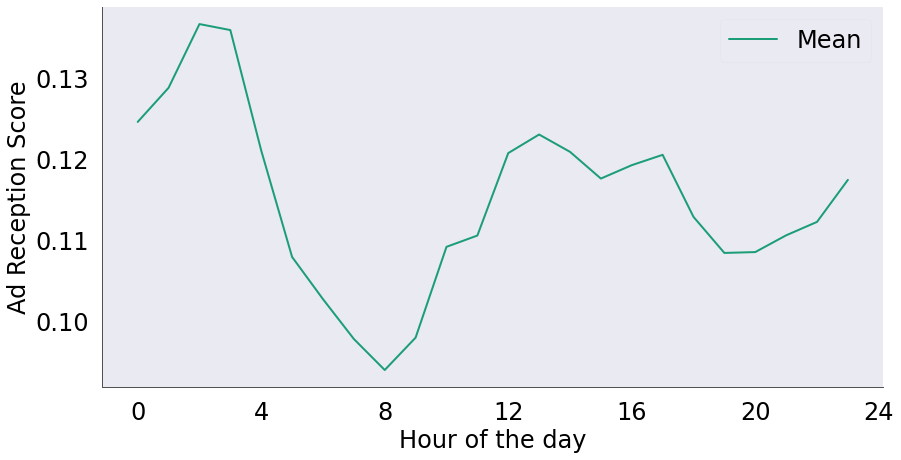

In [20]:
plotAdReceptionHourlyPlot(appSessionsByHourMeanDF, "Overall")

In [ ]:
clusterVals = list(set(appSessionsByHourClusterMeanDF.Cluster50.values))
for clusterNum in clusterVals:
    plotAdReceptionHourlyPlot(appSessionsByHourClusterMeanDF[appSessionsByHourClusterMeanDF.Cluster50==clusterNum], str(clusterNum))
    print("Plotted", clusterNum)

In [40]:
appSessionsByHourClusterMeanDF

,HourOfDay,Cluster50,a_session_time,a_time_spent_page_page_view,a_time_spent_camera,a_time_spent_search,a_time_spent_map,a_time_spent_memories,a_time_spent_df_page,a_time_spent_ff_page,a_time_spent_df_story_view,a_time_spent_ff_story,a_time_spent_chat_page,ad_reception
0,0.0,0,232.483697,18.833277,1.844334,0.000000,0.019960,0.489743,0.927807,1.486793,4.144070,3.881531,4.317456,0.197049
1,0.0,1,218.271328,13.006279,3.411204,0.001470,0.261651,0.361746,0.791552,3.383450,0.367885,2.134628,1.685812,0.061789
2,0.0,2,192.430558,23.002719,3.121044,0.001454,0.158311,0.400327,2.456351,2.232043,5.813556,3.130965,3.832520,0.169474
3,0.0,3,175.747941,7.503436,0.874551,0.000000,0.027274,0.136112,0.591684,1.291590,0.250392,0.861698,2.287753,0.000000
4,0.0,4,217.661163,28.877028,5.290086,0.000655,0.095401,1.545788,2.999116,2.382312,2.682821,4.793271,5.816031,0.085543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,23.0,45,147.314172,3.837466,1.335123,0.000000,0.001269,0.024722,0.369235,0.889893,0.179514,0.716426,0.221910,0.000000
1196,23.0,46,235.114633,22.559556,4.591657,0.000740,0.164774,1.577775,0.793908,2.768114,1.440624,3.440632,6.081900,0.135059
1197,23.0,47,209.521955,16.699256,3.790605,0.006182,0.117677,0.140141,0.398773,2.844951,1.179511,1.398375,5.813340,0.111366
1198,23.0,48,217.801620,21.812643,3.260348,0.005970,0.089640,0.859502,1.410923,2.060886,3.572505,3.426192,5.372501,0.078449


In [41]:
print(appSessionsByHourClusterMeanDF.shape)
print(appSessionsByHourMeanDF.shape)
print(appSessionsByHourClusterMeanDF.columns)
print(appSessionsByHourMeanDF.columns)

(1200, 14)
(24, 13)
Index(['HourOfDay', 'Cluster50', 'a_session_time',
       'a_time_spent_page_page_view', 'a_time_spent_camera',
       'a_time_spent_search', 'a_time_spent_map', 'a_time_spent_memories',
       'a_time_spent_df_page', 'a_time_spent_ff_page',
       'a_time_spent_df_story_view', 'a_time_spent_ff_story',
       'a_time_spent_chat_page', 'ad_reception'],
      dtype='object')
Index(['HourOfDay', 'a_session_time', 'a_time_spent_page_page_view',
       'a_time_spent_camera', 'a_time_spent_search', 'a_time_spent_map',
       'a_time_spent_memories', 'a_time_spent_df_page', 'a_time_spent_ff_page',
       'a_time_spent_df_story_view', 'a_time_spent_ff_story',
       'a_time_spent_chat_page', 'ad_reception'],
      dtype='object')


In [22]:
pivotedData = appSessionsByHourClusterMeanDF.pivot("Cluster50", "HourOfDay", "ad_reception" )
pivotedDataUnseen = appSessionsByHourClusterMeanUnseenDF.pivot("Cluster50", "HourOfDay", "ad_reception" )

In [31]:
# pivotedData

In [24]:
appSessionsByHourMeanDF_Modified = appSessionsByHourMeanDF
appSessionsByHourMeanDF_Modified["Cluster50"] = "Overall"
pivotedDataOverall = appSessionsByHourMeanDF_Modified.pivot("Cluster50", "HourOfDay", "ad_reception")

appSessionsByHourMeanDF_ModifiedUnseen = appSessionsByHourMeanUnseenDF
appSessionsByHourMeanDF_ModifiedUnseen["Cluster50"] = "Overall"
pivotedDataOverallUnseen = appSessionsByHourMeanDF_ModifiedUnseen.pivot("Cluster50", "HourOfDay", "ad_reception")

In [25]:
# pivotedDataOverall

HourOfDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Cluster50,,,,,,,,,,,,,,,,,,,,,
Overall,0.124594,0.128802,0.136654,0.135913,0.121065,0.107952,0.102751,0.097842,0.094017,0.098007,...,0.120908,0.117613,0.119262,0.120539,0.11289,0.108446,0.108552,0.110615,0.112271,0.117453


In [26]:
pivotedData = pandas.concat([pivotedData, pivotedDataOverall], axis = 0)

In [27]:
pivotedData

HourOfDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Cluster50,,,,,,,,,,,,,,,,,,,,,
0,0.197049,0.226303,0.190613,0.199603,0.199340,0.178844,0.178538,0.161323,0.160042,0.156581,...,0.168042,0.188326,0.214740,0.194908,0.176654,0.169399,0.191079,0.185884,0.182903,0.187007
1,0.061789,0.100300,0.127381,0.022222,0.018640,0.042760,0.076906,0.060360,0.046840,0.023606,...,0.068521,0.061837,0.060397,0.047562,0.071568,0.060876,0.081191,0.050530,0.054682,0.051547
2,0.169474,0.175640,0.109685,0.117727,0.114946,0.109376,0.107324,0.105224,0.109624,0.120617,...,0.152325,0.152710,0.137856,0.116991,0.146786,0.142824,0.106892,0.117986,0.135170,0.119672
3,0.000000,0.000000,0.142857,0.333333,0.000000,0.030844,0.018373,0.000000,0.056604,0.046610,...,0.056548,0.063636,0.143868,0.104610,0.065306,0.047847,0.016393,0.018325,0.015556,0.037500
4,0.085543,0.072814,0.081469,0.155032,0.066054,0.086089,0.069531,0.080264,0.074745,0.084592,...,0.085032,0.078766,0.089602,0.086989,0.091935,0.085893,0.076771,0.074778,0.063699,0.082849
5,0.122581,0.159809,0.199644,0.139921,0.134581,0.125982,0.106563,0.094655,0.088725,0.119796,...,0.141934,0.129433,0.151882,0.133029,0.120136,0.118157,0.121121,0.116743,0.140821,0.124999
6,0.000000,NaN,NaN,0.000000,NaN,0.368421,0.080000,0.147059,0.029412,0.005769,...,0.092593,0.000000,0.000000,0.025000,0.076923,0.060000,0.000000,0.090909,0.000000,0.000000
7,0.014493,0.551351,0.000000,0.000000,0.066667,0.030928,0.063918,0.034021,0.059343,0.034448,...,0.058065,0.044398,0.035807,0.028986,0.040000,0.029289,0.087148,0.023012,0.044322,0.038182
8,0.016331,0.100039,0.148148,0.009259,0.061607,0.065089,0.110334,0.107404,0.066917,0.087026,...,0.108062,0.064589,0.049603,0.131738,0.071805,0.065389,0.071239,0.060924,0.052198,0.041162


In [28]:
# appSessionsByHourClusterMeanDF["HourOfDay"].values

In [29]:
# max(appSessionsByHourClusterMeanDF.ad_reception.values)

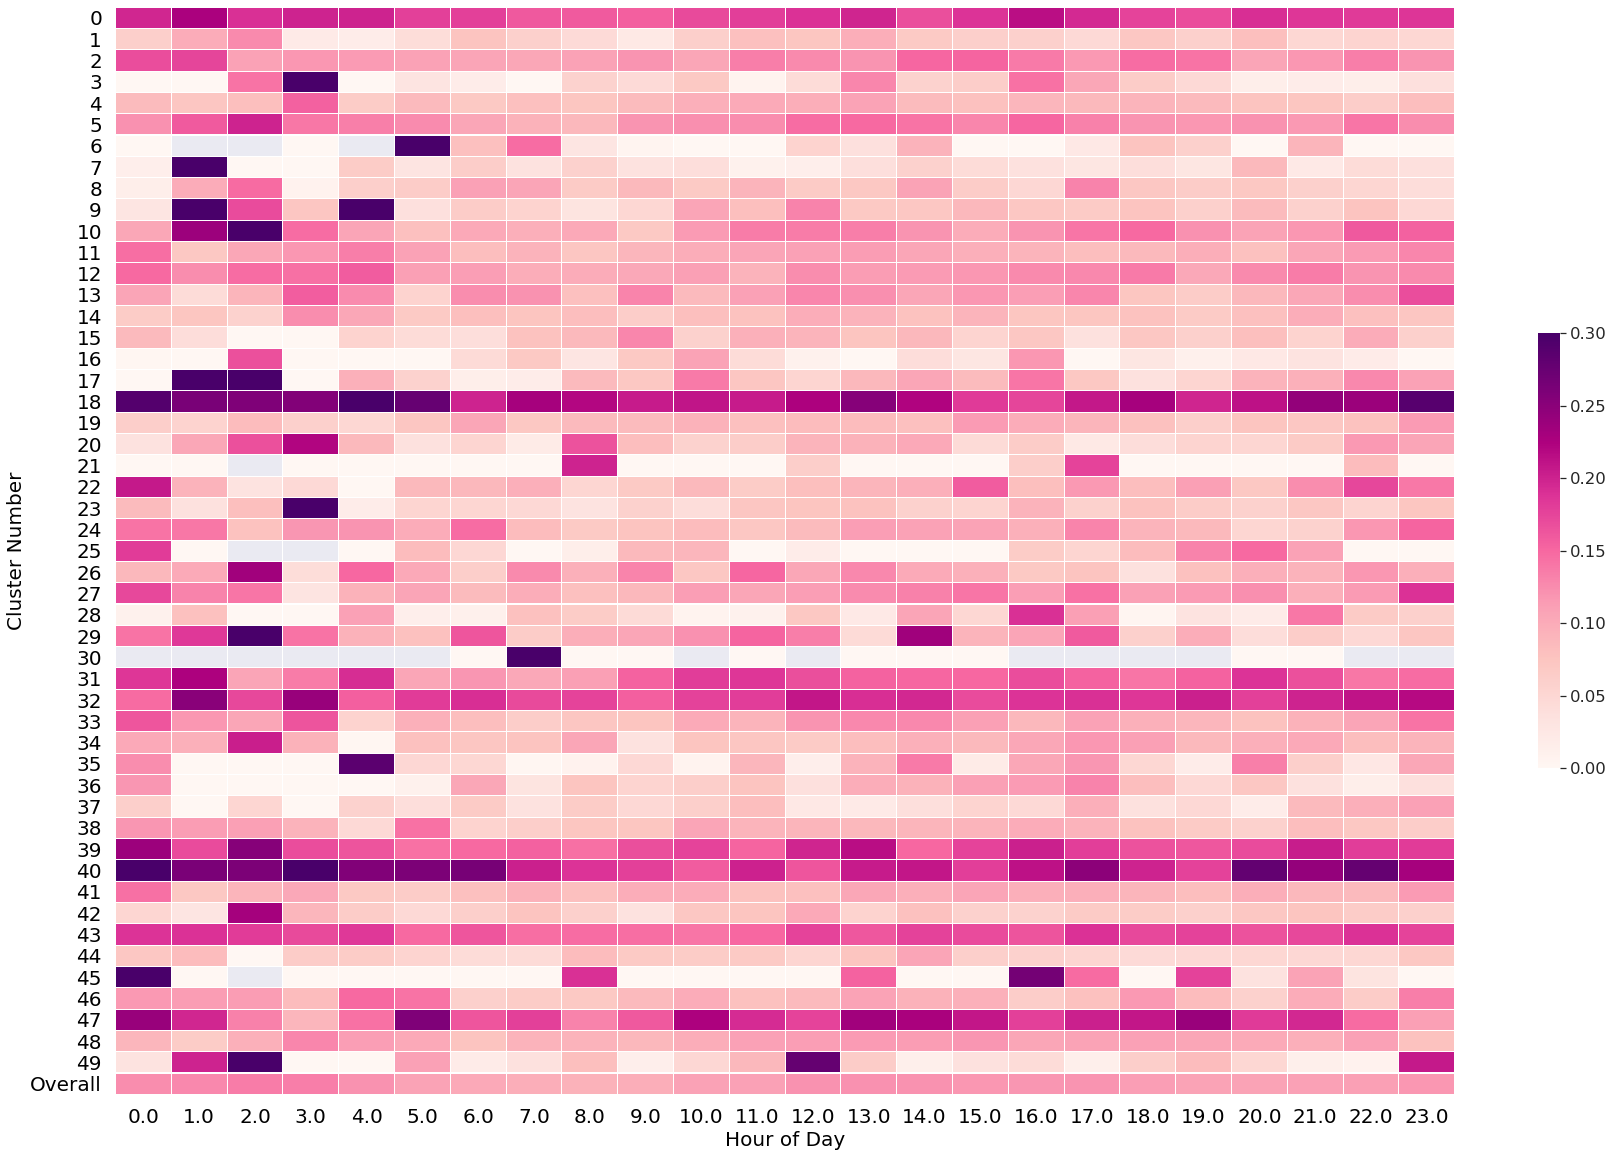

In [28]:
pp.figure(figsize=(30, 20))
setupMPPTufte()
pp.rcParams.update({'font.size': 22})
pp.rc('font', size=20)
sns.set(font_scale=1.5)
# sns.heatmap(xDF[:200][aggCols].transpose(), linewidth = 0.04, vmin = 0, vmax = 1, center = 0.5,  square = False,  xticklabels = False, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "horizontal", "shrink": .4, "anchor": "(0.5, 1.0)"})
# sns.heatmap(xDF[:200][aggCols].transpose(), linewidth = 0.04, vmin = 0.1, vmax = 0.7, center = 0.3,  square = False,  xticklabels = False, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "horizontal", "shrink": .4, "anchor": "(0.5, 1.0)"})
sns.heatmap(pivotedData, linewidth = 0.05, square = False, vmax=0.3, xticklabels = True, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "vertical", "shrink": .4, "anchor": "(0.5, 1.0)"})
# sns.heatmap(xDF[aggCols].transpose(), linewidth = 0.04, center = 0.1, square = False,  xticklabels = False, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "horizontal", "shrink": .4, "anchor": "(0.5, 1.0)"})

pp.gca().set_yticklabels(pivotedData.index, fontsize=20)
pp.gca().set_xticklabels(pivotedData.columns, fontsize=20)
pp.ylabel("Cluster Number", fontsize=20)
pp.xlabel("Hour of Day", fontsize=20)
# pp.gca().set_xticklabels(covAggDF.index, rotation = "vertical", fontsize = 24)
# pp.xticks(rotation=) 
# pp.xlabel("Cluster", fontsize = 24)
# pp.ylabel('')
#pp.savefig("output/plots/clusterHeatMap3.png", bbox_inches="tight", transparent = True)
# pp.show()
pp.savefig("output/plots/AdReceptionHeatHourlyHeatmap.png", bbox_inches="tight", transparent = True)
# pp.savefig("output/plots/AdReceptionHeatHourlyHeatmap"+str(time.time())+".png", bbox_inches="tight", transparent = True)
# pp.savefig("output/plots/HeatMap_"+clusterCol+".png", bbox_inches="tight", transparent = True)


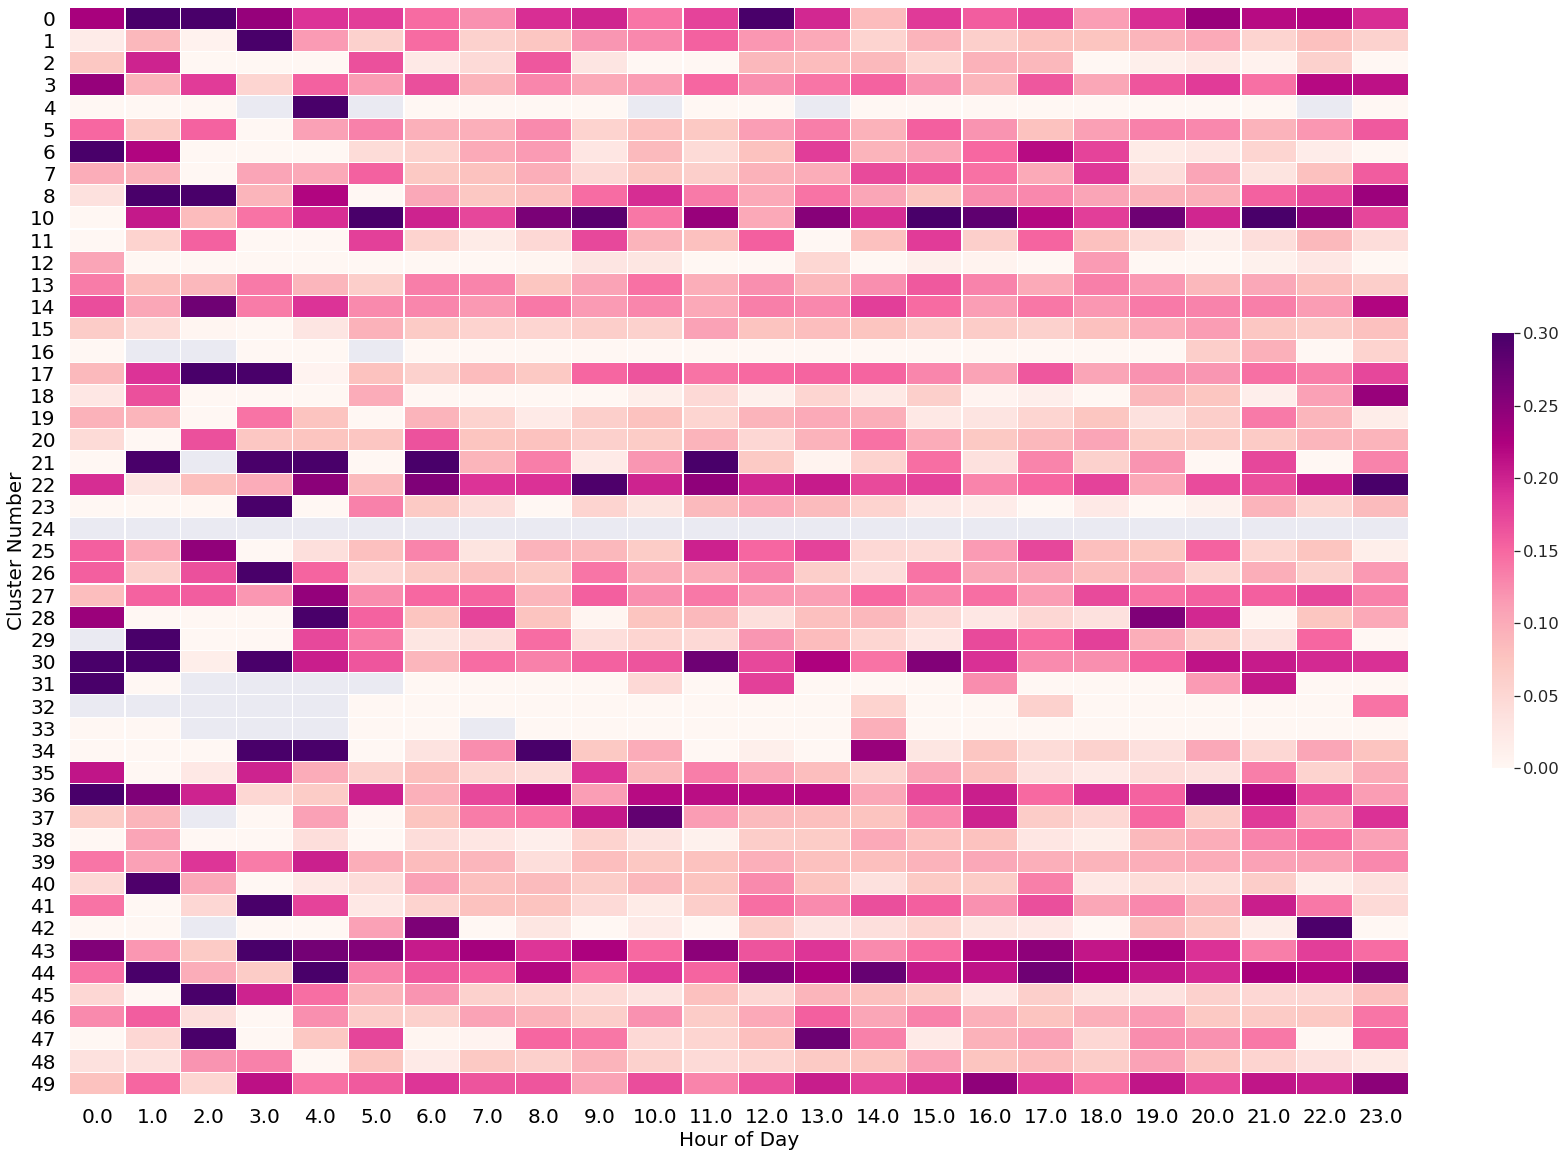

In [30]:
pp.figure(figsize=(30, 20))
setupMPPTufte()
pp.rcParams.update({'font.size': 22})
pp.rc('font', size=20)
sns.set(font_scale=1.5)
# sns.heatmap(xDF[:200][aggCols].transpose(), linewidth = 0.04, vmin = 0, vmax = 1, center = 0.5,  square = False,  xticklabels = False, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "horizontal", "shrink": .4, "anchor": "(0.5, 1.0)"})
# sns.heatmap(xDF[:200][aggCols].transpose(), linewidth = 0.04, vmin = 0.1, vmax = 0.7, center = 0.3,  square = False,  xticklabels = False, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "horizontal", "shrink": .4, "anchor": "(0.5, 1.0)"})
sns.heatmap(pivotedDataUnseen, linewidth = 0.05, square = False, vmax=0.3, xticklabels = True, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "vertical", "shrink": .4, "anchor": "(0.5, 1.0)"})
# sns.heatmap(xDF[aggCols].transpose(), linewidth = 0.04, center = 0.1, square = False,  xticklabels = False, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "horizontal", "shrink": .4, "anchor": "(0.5, 1.0)"})

pp.gca().set_yticklabels(pivotedDataUnseen.index, fontsize=20)
pp.gca().set_xticklabels(pivotedDataUnseen.columns, fontsize=20)
pp.ylabel("Cluster Number", fontsize=20)
pp.xlabel("Hour of Day", fontsize=20)
# pp.gca().set_xticklabels(covAggDF.index, rotation = "vertical", fontsize = 24)
# pp.xticks(rotation=) 
# pp.xlabel("Cluster", fontsize = 24)
# pp.ylabel('')
#pp.savefig("output/plots/clusterHeatMap3.png", bbox_inches="tight", transparent = True)
# pp.show()
pp.savefig("output/plots/AdReceptionHeatHourlyHeatmapUnseen.png", bbox_inches="tight", transparent = True)
# pp.savefig("output/plots/AdReceptionHeatHourlyHeatmapUnseen_"+str(time.time())+".png", bbox_inches="tight", transparent = True)
# pp.savefig("output/plots/HeatMap_"+clusterCol+".png", bbox_inches="tight", transparent = True)


In [32]:
pivotedData.head()

HourOfDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Cluster50,,,,,,,,,,,,,,,,,,,,,
0,0.197049,0.226303,0.190613,0.199603,0.199340,0.178844,0.178538,0.161323,0.160042,0.156581,...,0.168042,0.188326,0.214740,0.194908,0.176654,0.169399,0.191079,0.185884,0.182903,0.187007
1,0.061789,0.100300,0.127381,0.022222,0.018640,0.042760,0.076906,0.060360,0.046840,0.023606,...,0.068521,0.061837,0.060397,0.047562,0.071568,0.060876,0.081191,0.050530,0.054682,0.051547
2,0.169474,0.175640,0.109685,0.117727,0.114946,0.109376,0.107324,0.105224,0.109624,0.120617,...,0.152325,0.152710,0.137856,0.116991,0.146786,0.142824,0.106892,0.117986,0.135170,0.119672
3,0.000000,0.000000,0.142857,0.333333,0.000000,0.030844,0.018373,0.000000,0.056604,0.046610,...,0.056548,0.063636,0.143868,0.104610,0.065306,0.047847,0.016393,0.018325,0.015556,0.037500
4,0.085543,0.072814,0.081469,0.155032,0.066054,0.086089,0.069531,0.080264,0.074745,0.084592,...,0.085032,0.078766,0.089602,0.086989,0.091935,0.085893,0.076771,0.074778,0.063699,0.082849


In [43]:
denomData = pivotedData.replace(0, 1)

In [65]:
# diffData = ((pivotedData - pivotedDataUnseen)/denomData) * 100
diffData = (abs(pivotedData - pivotedDataUnseen))
print(np.mean(np.mean(diffData)))

0.08650723104376146


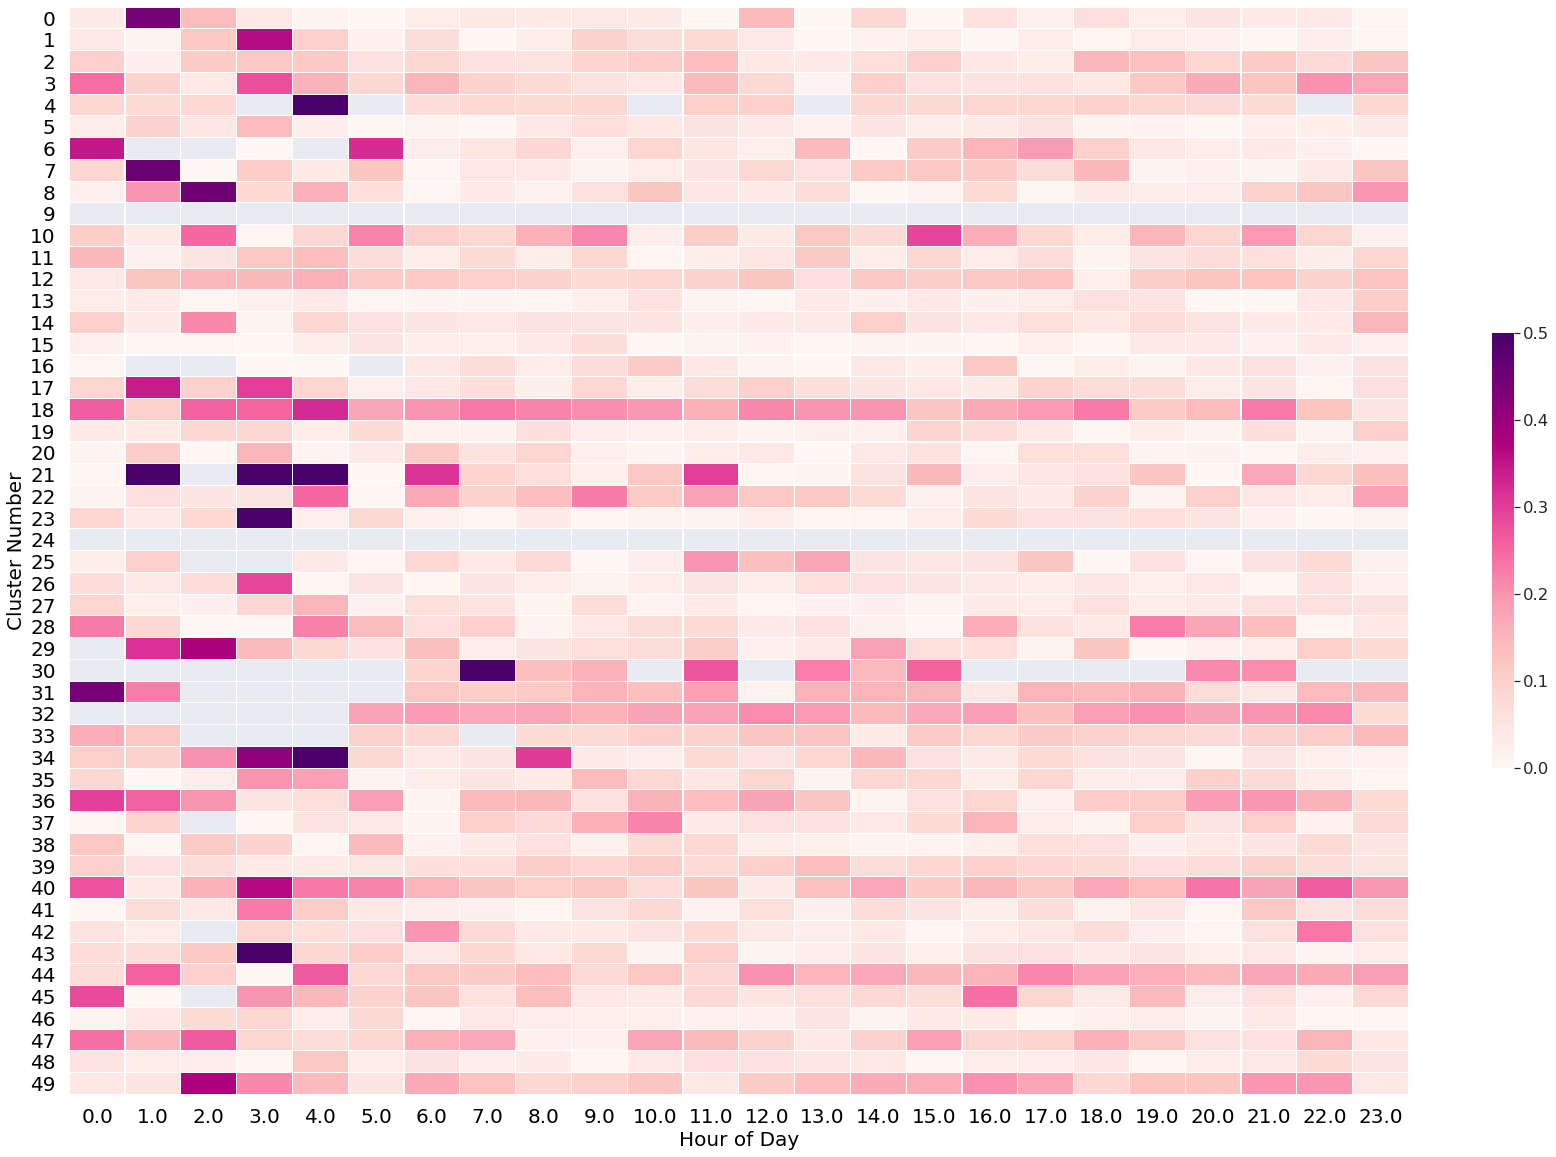

In [63]:
pp.figure(figsize=(30, 20))
setupMPPTufte()
pp.rcParams.update({'font.size': 22})
pp.rc('font', size=20)
sns.set(font_scale=1.5)
# sns.heatmap(xDF[:200][aggCols].transpose(), linewidth = 0.04, vmin = 0, vmax = 1, center = 0.5,  square = False,  xticklabels = False, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "horizontal", "shrink": .4, "anchor": "(0.5, 1.0)"})
# sns.heatmap(xDF[:200][aggCols].transpose(), linewidth = 0.04, vmin = 0.1, vmax = 0.7, center = 0.3,  square = False,  xticklabels = False, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "horizontal", "shrink": .4, "anchor": "(0.5, 1.0)"})
sns.heatmap(diffData, linewidth = 0.05, square = False, vmax=0.5, xticklabels = True, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "vertical", "shrink": .4, "anchor": "(0.5, 1.0)"})
# sns.heatmap(xDF[aggCols].transpose(), linewidth = 0.04, center = 0.1, square = False,  xticklabels = False, yticklabels = True, cmap = "RdPu", cbar = True, cbar_kws={"orientation": "horizontal", "shrink": .4, "anchor": "(0.5, 1.0)"})

pp.gca().set_yticklabels(diffData.index, fontsize=20)
pp.gca().set_xticklabels(diffData.columns, fontsize=20)
pp.ylabel("Cluster Number", fontsize=20)
pp.xlabel("Hour of Day", fontsize=20)
# pp.gca().set_xticklabels(covAggDF.index, rotation = "vertical", fontsize = 24)
# pp.xticks(rotation=) 
# pp.xlabel("Cluster", fontsize = 24)
# pp.ylabel('')
#pp.savefig("output/plots/clusterHeatMap3.png", bbox_inches="tight", transparent = True)
# pp.show()
pp.savefig("output/plots/AdReceptionHeatHourlyHeatmapError.png", bbox_inches="tight", transparent = True)
# pp.savefig("output/plots/HeatMap_"+clusterCol+".png", bbox_inches="tight", transparent = True)


In [51]:
for col in diffData.columns:
    print(np.min(diffData[col].values), np.median(diffData[col].values), np.mean(diffData[col].values), np.max(diffData[col].values))

# print(np.median(diffData))

-2257.1428571428564 0.0 -52.80829214342796 100.0
-312.1052631578948 3.0564078357328484 6.896050656628106 100.0
-375.14117955237214 0.0 5.011006781159162 100.0
-1630.769230769231 0.0 -78.75181405012616 100.0
-21600.0 0.0 -485.121750156274 100.0
-1655.681818181818 0.0 -68.81198259645814 100.0
-874.9689267098171 -0.05042782248430597 -57.898331645084674 100.0
-2057.7981651376144 1.469237832874174 -66.7023034735148 100.0
-485.0281162136833 -5.394873278678875 -32.18526555949844 100.0
-638.8932174183391 -0.7148175725986744 -45.827017355609065 100.0
-999.150743099788 0.0 -49.75843462220994 100.0
-1772.0301226551226 0.0 -52.65210321075148 100.0
-718.1818181818182 0.0 -55.496735199941334 100.0
-371.9722222222222 -0.390625 -24.9291131628687 100.0
-1240.929309837809 1.340054547722469 -25.735054808181033 100.0
-469.29257200598187 -5.66842352236406 -27.750302379870114 100.0
-453.8934555131334 21.35164110113724 -13.847175748251296 100.0
-1269.3329070929074 8.500347749271631 -49.66722917813639 100.0
-

In [72]:
diffData = diffData.fillna(0)
print(np.mean(np.mean(diffData)))

0.0788228724428503


In [ ]:
print(appSessionsByHourMeanDF.columns)
print(appSessionsByHourMeanUnseenDF.columns)

In [73]:
diffDataOverall = abs(pivotedDataOverall-pivotedDataOverallUnseen)
diffDataOverall = diffDataOverall.fillna(0)
print(np.mean(np.mean(diffDataOverall)))

0.006293451387898005


In [82]:
appSessionsByHourUserMeanDF.columns

Index(['HourOfDay', 'a_anon_user_id', 'a_session_time',
       'a_time_spent_page_page_view', 'a_time_spent_camera',
       'a_time_spent_search', 'a_time_spent_map', 'a_time_spent_memories',
       'a_time_spent_df_page', 'a_time_spent_ff_page',
       'a_time_spent_df_story_view', 'a_time_spent_ff_story',
       'a_time_spent_chat_page', 'ad_reception'],
      dtype='object')

In [93]:
# appSessionsByHourUserMeanDF
# appSessionsByHourUserMeanUnseenDF

# appSessionsByHourMeanDF_Modified = appSessionsByHourMeanDF
# appSessionsByHourMeanDF_Modified["Cluster50"] = "Overall"
# pivotedDataOverall = appSessionsByHourMeanDF_Modified.pivot("Cluster50", "HourOfDay", "ad_reception")

# appSessionsByHourMeanDF_ModifiedUnseen = appSessionsByHourMeanUnseenDF
# appSessionsByHourMeanDF_ModifiedUnseen["Cluster50"] = "Overall"
# pivotedDataOverallUnseen = appSessionsByHourMeanDF_ModifiedUnseen.pivot("Cluster50", "HourOfDay", "ad_reception")

pivotedDataUserLevel = appSessionsByHourUserMeanDF.pivot("a_anon_user_id", "HourOfDay", "ad_reception").fillna(0)
pivotedDataUserLevelUsnseen = appSessionsByHourUserMeanUnseenDF.pivot("a_anon_user_id", "HourOfDay", "ad_reception").fillna(0)



# overallError = pivotedDataOverall = appSessionsByHourMeanDF_Modified.pivot("Cluster50", "HourOfDay", "ad_reception")


# appSessionsByHourUserMeanUnseenDF 

# for clusterNum in clusterVals:
    


In [100]:
pivotedDataUserLevel
# pivotedDataOverall

HourOfDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
a_anon_user_id,,,,,,,,,,,,,,,,,,,,,
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.625,0.625,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
999913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
pivotedDataOverall

HourOfDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Cluster50,,,,,,,,,,,,,,,,,,,,,
Overall,0.124594,0.128802,0.136654,0.135913,0.121065,0.107952,0.102751,0.097842,0.094017,0.098007,...,0.120908,0.117613,0.119262,0.120539,0.11289,0.108446,0.108552,0.110615,0.112271,0.117453


In [99]:
overallError = pivotedDataUserLevel - pivotedDataOverall
overallError

HourOfDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999913,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
pivotedDataUserLevel = pivotedDataUserLevel.fillna(0)

In [92]:
overallError = np.mean(np.mean((pivotedDataUserLevel - pivotedDataOverall).fillna(0)))
# overallError = pivotedDataUserLevel - pivotedDataOverall
print(overallError)

0.0


In [ ]:
for clusterNum in clusterVals:
    error = diffData

In [74]:
diffDataOverall

HourOfDay,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,23.0
Cluster50,,,,,,,,,,,,,,,,,,,,,
Overall,0.007544,0.021643,0.01178,0.008494,0.010949,0.005527,0.005784,0.000904,0.000501,0.00196,...,0.007811,0.004632,0.009442,0.010305,0.007391,0.005651,0.002841,0.000767,0.007407,0.003003


In [ ]:
appSessionsByHourMeanDF.columns
# appSessionsByHourClusterMeanDF

In [30]:
# appSessionsByHourMeanDF.Cluster50.values

In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LassoLars
from sklearn.model_selection import LeaveOneOut
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

In [32]:
def smape(A, F):
    d = np.abs(A) + np.abs(F)
    return (100.0/len(A)) * np.sum(np.abs(F - A) / d)

In [33]:
from sklearn.linear_model import LinearRegression
X = appSessionsByHourMeanDF[["HourOfDay", "a_session_time"]]
y = appSessionsByHourMeanDF.ad_reception.values
# np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
# y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
score = reg.score(X, y)

coeffs = reg.coef_

print(score)
print(coeffs)
print(score, coeffs)

0.31014235599608586
[-0.00028272  0.00023177]
0.31014235599608586 [-0.00028272  0.00023177]


In [34]:
for clusterNum in clusterVals:
    df = appSessionsWithLocalTimeDF[appSessionsWithLocalTimeDF.Cluster50==clusterNum]
    df = df.fillna(0)
    X = df[["HourOfDay", "a_session_time"]]
    y = df["ad_reception"].values
    
    trainIdx = int(0.8*len(df))
    trainX, testX = X[0:trainIdx], X[trainIdx:len(X)]
    trainY, testY = y[0:trainIdx], y[trainIdx:len(y)]
#     print(X.shape, X.size, len(X))

    
    model = GradientBoostingRegressor().fit(trainX, trainY)
    predY = model.predict(testX)
    error = smape(predY, testY)
    score = reg.score(X, y)
    print(clusterNum, score, error)

#     coeffs = reg.coef_
#     print(score)
#     print(coeffs)
#     print(clusterNum, score, coeffs)

0 -0.8544403127595692 99.31639899705854
1 -8.600222026534807 99.99205756330586
2 -2.9119056361218316 99.89596381573205
3 -20.13846959350122 99.99973621874749
4 -6.601473140143177 99.98010658982417
5 -2.236458438299361 99.77962058883475
6 -20.785320877575064 99.999991080071
7 -25.547589767198623 99.99978962875673
8 -7.373742099521795 99.9917774077084
9 -10.829524067562676 99.99490562693595
10 -2.730104328484179 99.9168215294355
11 -3.9219105558123255 99.95073760277782
12 -2.091591838476691 99.78045865409905
13 -3.905379547970387 99.95369062985941
14 -6.065494581760156 99.98324316355477
15 -10.994141226867955 99.99895795449542
16 -26.466535662273536 99.99980361666717
17 -6.483067698221088 99.99106015687941
18 -0.7866219960297385 99.51419118901921
19 -7.815521058360058 99.98916386706519
20 -13.921177096505673 99.9998624023028
21 -78.85964350941903 100.0
22 -6.652379997839475 99.99441010544153
23 -17.441835166607557 99.99947061009348
24 -5.277167009981409 99.97588541009455
25 -22.442941221

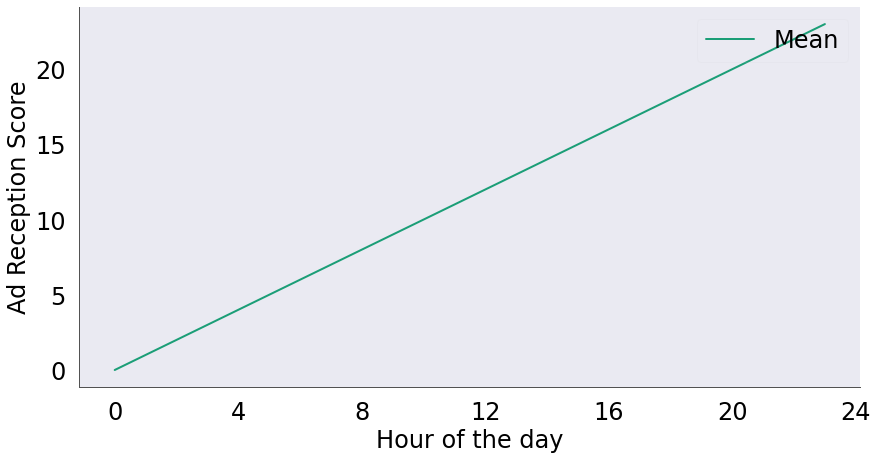

In [35]:
frequencyPlot = "output/plots/adreception_hourly/AdReceptionByHour_Overall.png"
pp.figure(figsize=(14, 7))
setupMPPTufte()
pp.rcParams.update({'font.size': 20})

#csCol, ctCol, neitherCol = "#018571", "#dfc27d", "#636363"
neuColor = "#969696"
lrColor, nlrColor = "#49006a", "#e66101"
csCol, ctCol, neitherCol = "#2c7bb6", "#d7191c", "#636363"
mtchCol, unmtchCol = "#dd1c77", "#31a354"
greyCol = "#636363"

cols = ["#1b9e77", "#d95f02", "#7570b3", "#e7298a", "#66a61e"]

pp.plot(appSessionsByHourMeanDF.HourOfDay.values, appSessionsByHourMeanDF.HourOfDay.values, color = cols[0], linewidth = 2, label = "Mean")
pp.gca().set_xlabel('Hour of the day')
pp.gca().set_ylabel("Ad Reception Score")
pp.legend(loc='upper right')

pp.gca().xaxis.set_major_locator(ticker.MultipleLocator(4))
pp.savefig(frequencyPlot, bbox_inches="tight", transparent = True)

